In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [24]:
features, true_labels = make_blobs(n_samples=500, centers=5, cluster_std=4, random_state=42)

In [25]:
features[0:4]

array([[ 4.59089174, -1.6158478 ],
       [ 1.66335746,  9.92192042],
       [-3.09891736,  7.65128087],
       [-8.32519052, -2.12438088]])

In [27]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [28]:
features_scaled[0:4]

array([[ 1.03790773, -0.69294275],
       [ 0.59658309,  0.94885494],
       [-0.12132795,  0.62574819],
       [-0.90918657, -0.76530583]])

In [29]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42)

In [30]:
kmeans.fit(features_scaled)

KMeans(init='random', n_clusters=5, random_state=42)

In [31]:
kmeans.cluster_centers_

array([[ 0.27600405, -0.13109395],
       [-0.77428004, -1.61917513],
       [-1.06894105,  0.65499923],
       [ 1.41542211, -0.15466184],
       [ 0.29565726,  1.07908086]])

In [33]:
kmeans.labels_[0:10]

array([3, 4, 4, 1, 1, 0, 1, 4, 4, 4], dtype=int32)

In [34]:
sse_list = []
for i in range(1, 11):
    kmeans = KMeans(init="random", n_clusters=i, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(features_scaled)
    sse_list.append(kmeans.inertia_)

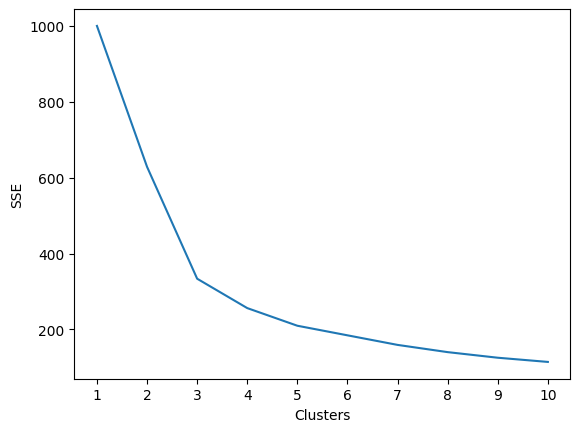

In [35]:
 plt.plot(range(1, 11), sse_list)
 plt.xticks(range(1, 11))
 plt.xlabel("Clusters")
 plt.ylabel("SSE")
 plt.show()

In [36]:
k_elbow = KneeLocator(range(1, 11), sse_list, curve="convex", direction="decreasing")
k_elbow.elbow

3

In [37]:
silhouette_list = []

for i in range(2, 11):
    kmeans = KMeans(init="random", n_clusters=i, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_list.append(score)

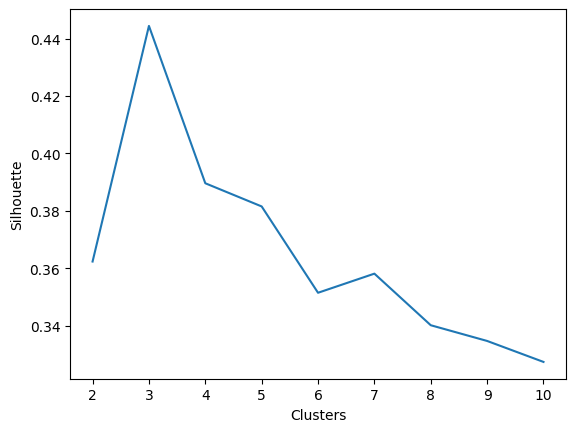

In [39]:
plt.plot(range(2, 11), silhouette_list)
plt.xticks(range(2, 11))
plt.xlabel("Clusters")
plt.ylabel("Silhouette")
plt.show()